In [1]:
from params import FuzzyInputVariable_3Trapezoids, FuzzyInputVariable_2Trapezoids, FuzzyInputVariable_List_Trapezoids
from operators import productN
import numpy as np
#from helps_and_enhancers import *
import matplotlib.pyplot as plt
from ANFIS import ANFIS
import time
import copy
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

import math

<H1>Przygotowanie zbioru danych: XOR<H1>

In [2]:
%matplotlib qt
x = np.arange(1, 2, 0.1)
x,y = np.meshgrid(x, x)

dataX = x.flatten()
dataY = y.flatten()
dataXY1 = np.column_stack((dataX,dataY,np.ones(len(dataX))))
dataXY = np.column_stack((dataX,dataY))

#data_labels = np.logical_xor(dataX >= 0.5, dataY >= 0.5)
dataXround = [int(round(x)) for x in dataX]
dataYround = [int(round(y)) for y in dataY]
data_labels = np.multiply(dataXround, dataYround)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

rgb = [[1,0,0] if cc else [0,1,0] for cc in data_labels]

ax.scatter(dataX, dataY, data_labels, c=rgb)

plt.show()

<H1>Utworzenie funkcji przynależności</H1>

In [3]:
varX = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "XAxis", ["L","H"]) # low, high
varY = FuzzyInputVariable_2Trapezoids(0.5, 0.5, "YAxis", ["L","H"])

# [1, 1.5] [1, 2] [1.5, 2]
mf1 = [[-0.5, 0.25, 0.25, 0.25], [0.5, 0.25, 0.1, 0.1]]
# mf1 = [[1, 1, 1, 2], [1, 2, 2, 2]]
# mf1 = [[-0.5, 0.25, 0.5, 0.5]]
mf1 = [[1, 0, 0, 1], [2, 0, 1, 0]]
varX = FuzzyInputVariable_List_Trapezoids(mf1, "XAxis", ["L","H"])
varY = FuzzyInputVariable_List_Trapezoids(mf1, "YAxis", ["L","H"])



#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show()
plt.legend()
# plt.xlim(0, 3)

plt.figure()
varY.show()
plt.legend()
# plt.xlim(0, 3)

plt.show()

<H1>Inicjalizacja systemu ANFIS</H1>

In [7]:
X_train, X_test, y_train, y_test = train_test_split(dataXY, data_labels, test_size=0.2, random_state=25)

fis = ANFIS([varX, varY], X_train.T, y_train)

print("Parametry początkowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

fis.show_results()

Parametry początkowe:
Przesłanki:  [(array([0.61615093, 2.83463983, 2.70310871, 1.7680636 ]), array([2.00737966, 1.04240056, 0.06439679, 0.57984409])), (array([0.00000000e+00, 0.00000000e+00, 9.81348358e-16, 2.12578137e+00]), array([0.65647633, 1.65539714, 0.86149076, 0.        ]))] 
Konkluzje:  [[0.72699044 0.94683517 0.18303749]
 [0.08794987 0.13173666 0.90072077]
 [0.15741466 0.96639611 0.90055385]
 [0.21269244 0.97166777 0.97401565]]


<H1>Uczenie systemu ANFIS</H1>

In [8]:
start = time.time()
fis.train(True, True, False, True, n_iter=100)
end = time.time()
print("TIME elapsed: ", end - start)   
fis.training_data = X_train.T
fis.expected_labels = y_train
fis.show_results()

print("Konkluzje:", fis.tsk)

Optymalizacja zakończona!
z blędem:   1.8437078759915857
Liczba ew:  155455
Liczba it:  100
TIME elapsed:  34.27199864387512
Konkluzje: [[3.07195793e-05 4.52997627e-05 1.99991443e+00]
 [7.85027230e-01 1.56757042e+00 2.00000000e+00]
 [2.74891151e-05 5.26294916e-01 1.68628391e-11]
 [5.08943141e-12 6.08904258e-01 1.46191672e+00]]


In [9]:
fis.training_data = X_test.T
fis.expected_labels = y_test
fis.show_results()

y_pred = fis.anfis_estimate_labels(fis.premises,fis.op,fis.tsk)
y_pred = list(map(round,y_pred.flatten()))
print(confusion_matrix(y_test, y_pred))

[[3 0 0]
 [0 9 0]
 [0 0 8]]


<H1>Sprawdzanie parametrów jakich nauczył się system</H1>

In [11]:
#Wyświetlanie funkcji przynależnosci
plt.figure()
varX.show(x = np.arange(0, 3, 0.1))
plt.legend()

plt.figure()
varY.show(x = np.arange(0, 3, 0.1))
plt.legend()

plt.show()

In [75]:
print("Parametry końcowe:\nPrzesłanki: ",fis.premises, "\nKonkluzje: ", fis.tsk)

Parametry końcowe:
Przesłanki:  [[[2.77135903e+00 7.71452725e-01 9.79643047e-01 1.27051730e+00]
  [2.12433936e-01 2.09215606e+00 1.42315255e+00 1.97315506e-01]]

 [[1.48070617e+00 1.57849946e+00 5.83416546e-15 3.60315137e+00]
  [2.39711674e+00 1.86489405e+00 3.95870891e-02 0.00000000e+00]]] 
Konkluzje:  [[1.40863119e-05 3.21347681e-06 1.99997252e+00]
 [1.02265657e-15 4.06039009e-17 1.00000141e+00]
 [1.17628468e+00 1.17664660e+00 2.00000000e+00]
 [2.94041421e-01 3.92226844e-01 2.00000000e+00]]


<H1>Sprawdzanie wpływu parametrów na wyniki systemu</H1>

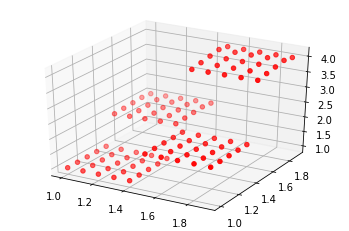

In [67]:
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

TypeError: cannot unpack non-iterable numpy.float64 object

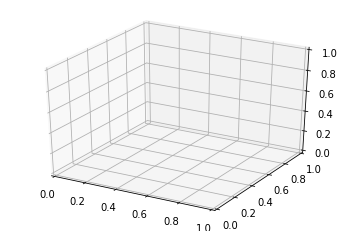

In [68]:
fis.premises = [[0.5, 0.01], [0.5, 0.01]]
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

In [ ]:
fis.tsk = ##################
fis.training_data = dataXY.T
fis.expected_labels = data_labels
fis.show_results()

<H1>Zadanie</H1>

Naucz system ANFIS tabliczki mnożenia. Zacznij od rozmiaru 2x2 i zwiększaj w obu kierunkach z krokiem 1 (kolejno 2x2, 3x3, 4x4 ...). Mierz czas jaki jest potrzebny na nauczenie systemu w zależności od wymiarów tabliczki. Zrób wykres wymiaru tabliczki od czasu uczenia i wyślij wraz ze swoim komentarzem na maila iperenc@kis.p.lodz.pl. Nie musisz dojść do rozmiaru 10x10, ważne żeby było widać jaka jest zależność.

In [ ]:
%matplotlib auto

In [ ]:
%matplotlib inline